In [1]:
!pip -q install opencv-python

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#uploading images
from google.colab import files
uploaded = files.upload()
print(list(uploaded.keys()))

Saving redbell_pepper.jpg to redbell_pepper.jpg
['redbell_pepper.jpg']


In [4]:
# Helper function
def show_bgr(img, title="image", size=6):
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(size, size))
    plt.imshow(rgb)
    plt.title(title)
    plt.axis("off")
    plt.show()

def show_gray(img, title="gray", size=6):
    plt.figure(figsize=(size, size))
    plt.imshow(img, cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()

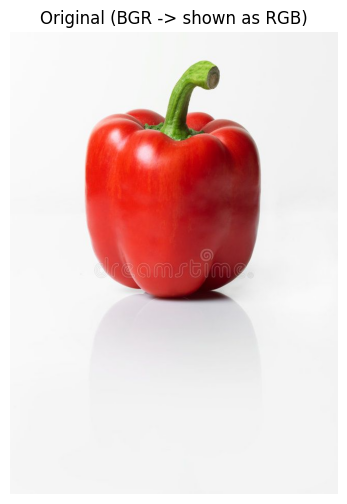

In [5]:
# Read Image
IMG_PATH = "redbell_pepper.jpg"
img = cv2.imread(IMG_PATH)
if img is None:
    raise FileNotFoundError("Image not found. Check filename in Colab sidebar.")
show_bgr(img, "Original (BGR -> shown as RGB)")

**PART A — Filters**

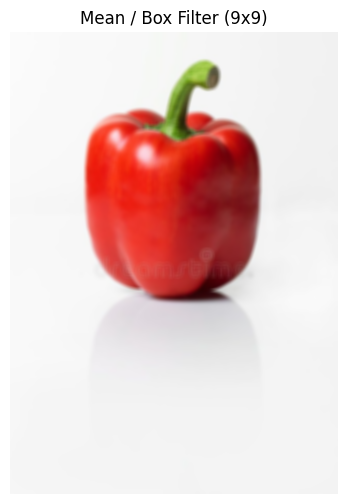

In [6]:
# Applying Mean/Box Filter
mean = cv2.blur(img, (9,9))
show_bgr(mean, "Mean / Box Filter (9x9)")

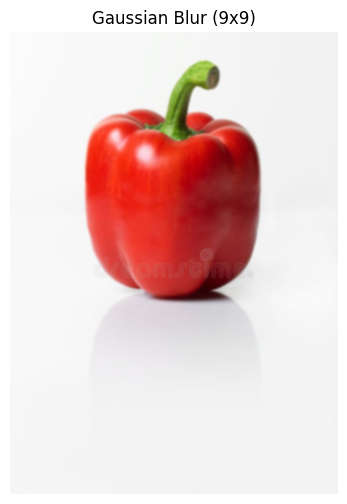

In [7]:
# Applying Gaussian Filter
gauss = cv2.GaussianBlur(img, (9,9), 0)
show_bgr(gauss, "Gaussian Blur (9x9)")

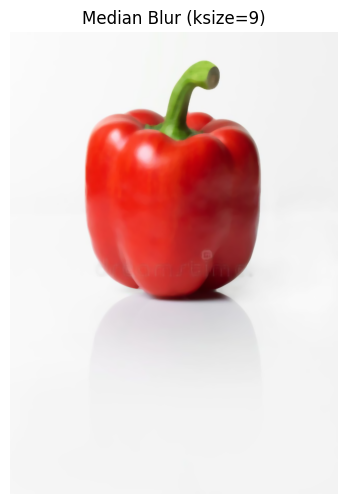

In [8]:
# Applying Median Filter
median = cv2.medianBlur(img, 9)
show_bgr(median, "Median Blur (ksize=9)")

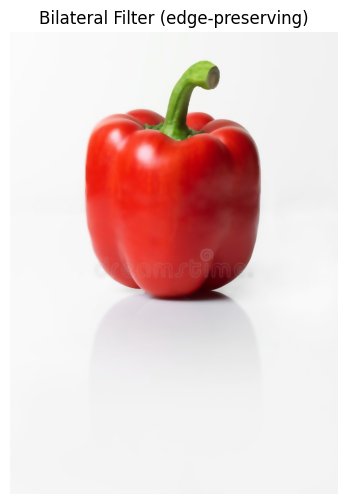

In [9]:
# Applying Bilateral Filter
bilat = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)
show_bgr(bilat, "Bilateral Filter (edge-preserving)")

**PART B — Edge operators**

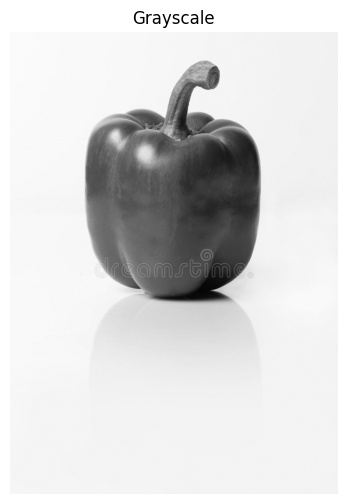

In [10]:
# Converting to Gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_gray(gray, "Grayscale")

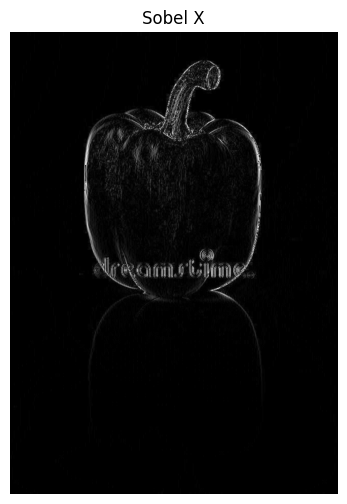

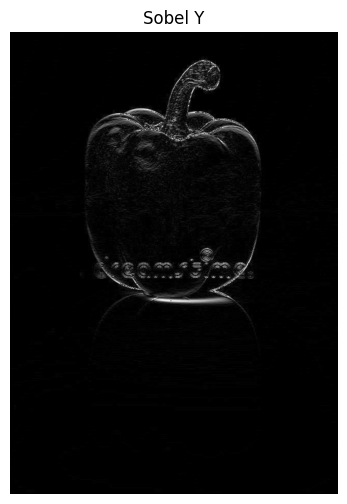

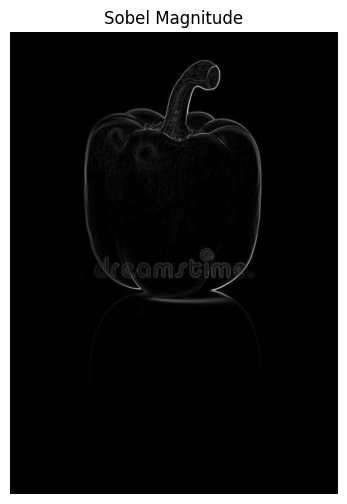

In [11]:
# Sobel (X, Y, Magnitude)
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

mag = np.sqrt(sobelx**2 + sobely**2)
mag = np.uint8(255 * mag / (mag.max() + 1e-8))

show_gray(np.uint8(np.absolute(sobelx)), "Sobel X")
show_gray(np.uint8(np.absolute(sobely)), "Sobel Y")
show_gray(mag, "Sobel Magnitude")

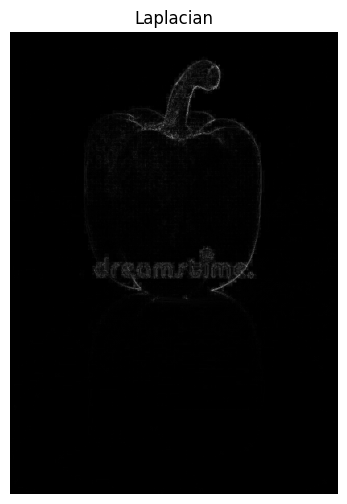

In [12]:
# Laplacian (2nd derivative)
lap = cv2.Laplacian(gray, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))
show_gray(lap, "Laplacian")

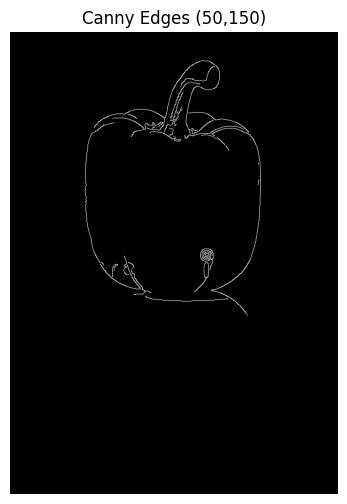

In [13]:
# Canny Edge Detector
# Often we blur first to reduce noise
gray_blur = cv2.GaussianBlur(gray, (5,5), 0)
canny = cv2.Canny(gray_blur, threshold1=50, threshold2=150)
show_gray(canny, "Canny Edges (50,150)")

**PART C — Common image transformations**

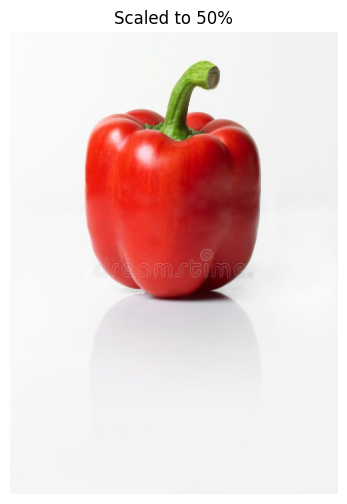

In [14]:
# Resize (Scaling)
scaled = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
show_bgr(scaled, "Scaled to 50%")

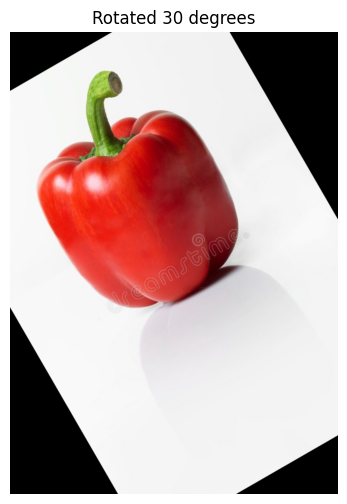

In [15]:
# Rotation
h, w = img.shape[:2]
M = cv2.getRotationMatrix2D((w//2, h//2), 30, 1.0)  # rotate 30 degrees
rot = cv2.warpAffine(img, M, (w, h))
show_bgr(rot, "Rotated 30 degrees")

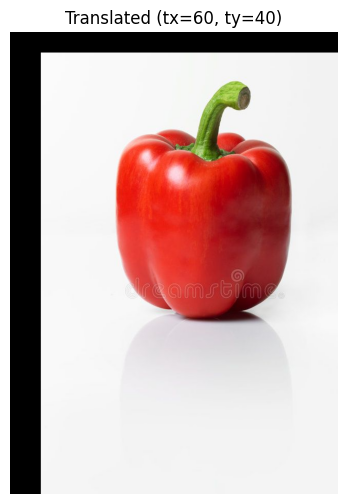

In [16]:
# Translation (Shift)
tx, ty = 60, 40
T = np.float32([[1, 0, tx],
                [0, 1, ty]])
trans = cv2.warpAffine(img, T, (w, h))
show_bgr(trans, f"Translated (tx={tx}, ty={ty})")

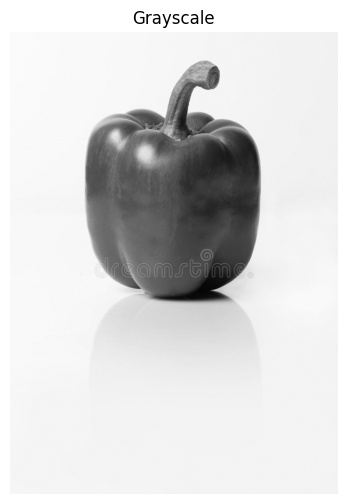

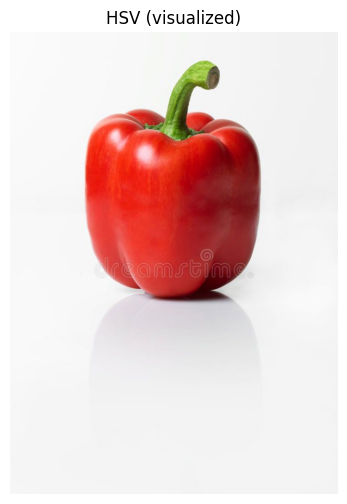

In [17]:
# Color space transformations (RGB/Gray/HSV)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# show HSV by converting back to RGB
hsv_vis = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

show_gray(gray, "Grayscale")
show_bgr(hsv_vis, "HSV (visualized)")

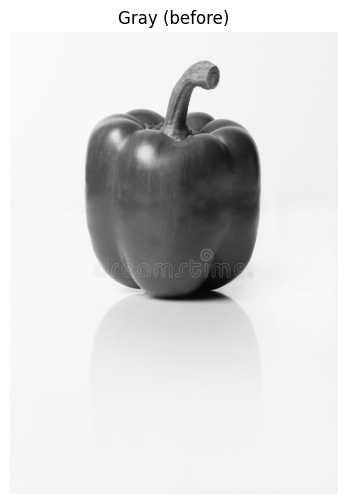

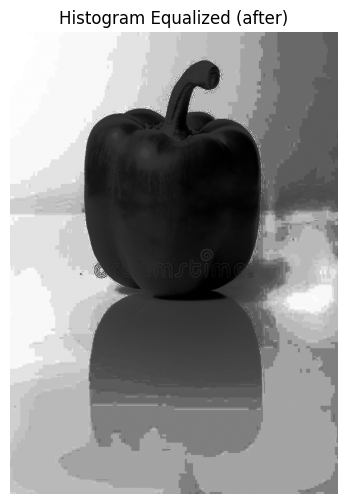

In [18]:
# Histogram Equalization (on grayscale)
eq = cv2.equalizeHist(gray)
show_gray(gray, "Gray (before)")
show_gray(eq, "Histogram Equalized (after)")

**PART D — Pyramids**

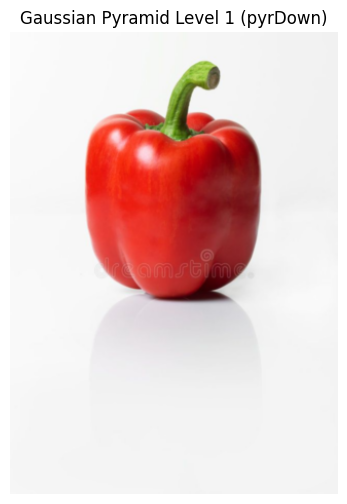

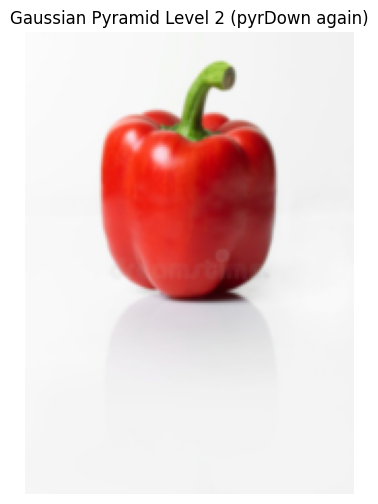

In [19]:
# Gaussian pyramid (pyrDown)
g1 = cv2.pyrDown(img)   # level 1
g2 = cv2.pyrDown(g1)    # level 2

show_bgr(g1, "Gaussian Pyramid Level 1 (pyrDown)")
show_bgr(g2, "Gaussian Pyramid Level 2 (pyrDown again)")

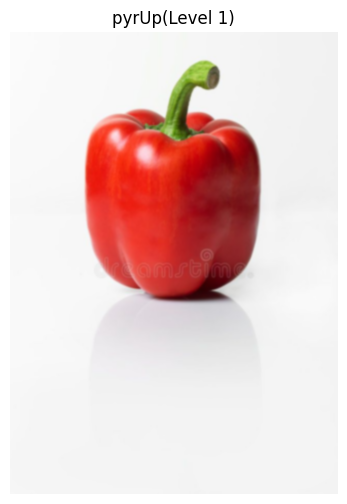

In [20]:
# pyrUp (upsample back)
up = cv2.pyrUp(g1)  # back toward original size
show_bgr(up, "pyrUp(Level 1)")

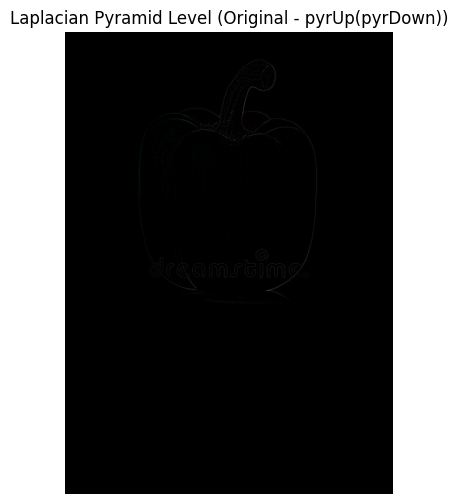

In [21]:
# Laplacian pyramid (difference between levels)
g1_up = cv2.pyrUp(g1)
g1_up = cv2.resize(g1_up, (w, h))  # ensure exact match

lap_pyr = cv2.subtract(img, g1_up)
show_bgr(lap_pyr, "Laplacian Pyramid Level (Original - pyrUp(pyrDown))")